<div>
<img src="https://i.ibb.co/v3CvVz9/udd-short.png" width="150"/>
    <br>
    <strong>Universidad del Desarrollo</strong><br>
    <em>Magíster en Data Science</em><br>
    <em>Profesor: Tomás Fontecilla </em><br>

</div>

# Machine Learning
*28 de Septiembre de 2024*

**Nombre Estudiante(s)**: ` Nicolas Gonzales - Giuseppe Lavarello - Camilo Rivera`  

In [1]:
# Importar librerias
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from PIL import Image

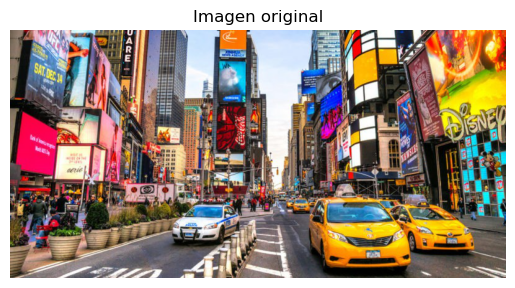

(320000, 3)

In [2]:


# Cargar imagen
image_path = './data/ciudad.jpeg'
image = Image.open(image_path)
image = image.convert('RGB')  # Asegurar que la imagen está en formato RGB
image_array = np.array(image)

# Mostrar imagen original
plt.imshow(image_array)
plt.axis('off')  # Sin ejes
plt.title("Imagen original")
plt.show()

# Reformatear la imagen para el clustering (filas y columnas en un array 2D)
pixels = image_array.reshape(-1, 3)  # Flatten the image to [n_pixels, 3]

pixels.shape


In [3]:
# Ver las dimensiones de la imagen original
width, height = image.size
print(f"Dimensiones de la imagen: {width} x {height}")
total_pixels = width * height
print(f"Total de píxeles: {total_pixels}")

Dimensiones de la imagen: 800 x 400
Total de píxeles: 320000


La imagen ha sido cargada correctamente, y el conjunto de datos para los píxeles ha sido transformado a una matriz de dimensiones 
(320000,3), donde cada fila representa un píxel con sus valores RGB.

Ahora, se procede con el análisis de clustering utilizando KMeans, Clustering Jerárquico y Gaussian Mixtures, comenzando por el algoritmo KMeans para encontrar la paleta de colores más representativa mediante un gráfico scree-plot (método del codo) y determinar cuántos colores son óptimos

### Determinación del número óptimo de colores

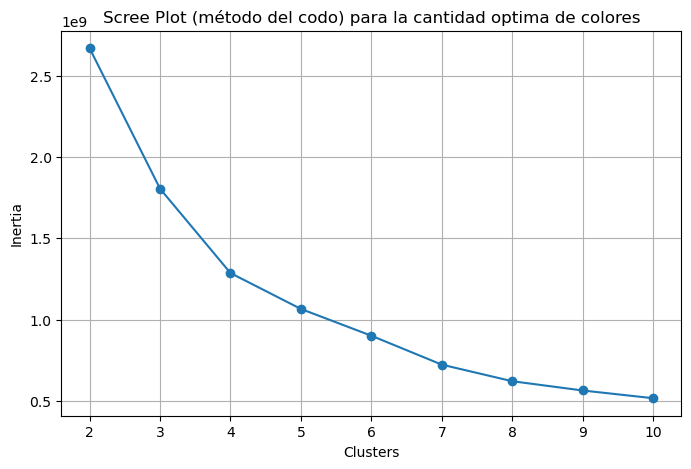

In [4]:
# Método del codo (Scree.plot) para determinar la cantidad óptima de colores para KMeans
def calculate_inertia(pixels, max_clusters=10):
    inertia = []
    for k in range(2, max_clusters+1):
        kmeans = KMeans(n_clusters=k, random_state=42).fit(pixels)
        inertia.append(kmeans.inertia_)
    return inertia

# Graficar incercia para las cantidades de clusters
inertia = calculate_inertia(pixels, max_clusters=10)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Scree Plot (método del codo) para la cantidad optima de colores')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### KMeans y paleta de colores

In [5]:
# Supongamos que el número óptimo de clusters es 7
n_clusters = 7  
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(pixels)

palette = kmeans.cluster_centers_.astype(int)
# Mostrar la paleta de colores encontrada
print("Paleta de colores obtenida:", palette)

Paleta de colores obtenida: [[ 41  33  28]
 [181 151 141]
 [210  48  47]
 [106  91  84]
 [228 230 230]
 [240 178  19]
 [ 56 140 195]]


In [6]:
# 'palette' contiene los colores obtenidos por KMeans
# 'palette' es el array de los centros de los clusters, cada fila es un color RGB

def display_palette(palette):
    # Crear una imagen que represente la paleta de colores
    palette = np.array(palette, dtype=np.uint8)  # Asegurarnos de que los valores estén en formato correcto
    n_colors = len(palette)

    # Crear una figura de 1 fila por 'n_colors' columnas para mostrar los colores
    fig, ax = plt.subplots(1, n_colors, figsize=(n_colors, 1))

    for i in range(n_colors):
        ax[i].imshow([[palette[i]]])  # Mostrar el color i-ésimo en un cuadrado
        ax[i].axis('off')  # Quitar ejes para que solo se vean los colores

    plt.show()
# Llamar a la función con la paleta obtenida por KMeans

### Reconstrucción de la imagen con Kmeans

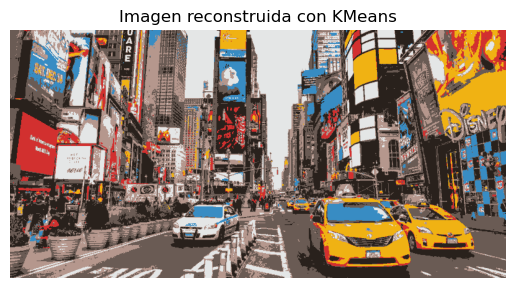

In [7]:
# Asignar los nuevos colores a la imagen (reducida)
kmeans_labels = kmeans.predict(pixels)
reduced_img_kmeans = palette[kmeans_labels].reshape(image_array.shape)

# Mostrar la imagen reconstruida usando KMeans
plt.imshow(reduced_img_kmeans)
plt.title("Imagen reconstruida con KMeans")
plt.axis('off')
plt.show()

#### Aplicación Clustering Jerárquico

In [8]:
# Reducir el tamaño de la imagen
small_image = image.resize((int(image.width / 2), int(image.height / 2)))  # Cambiar el factor según sea necesario. con 2 no me corre
small_image_array = np.array(small_image)

# Aplanar la imagen reducida
small_pixels = small_image_array.reshape(-1, 3)

# Aplicar el clustering jerárquico a la imagen más pequeña
hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
hierarchical_labels = hierarchical.fit_predict(small_pixels)




Paleta de colores obtenida: [[109  93  80]
 [177 106 111]
 [168   6   3]
 [249 123  14]
 [218 207 226]
 [ 92 123 142]
 [241  43  64]]


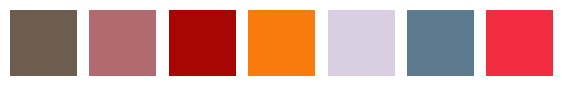

In [9]:
# Crear la nueva paleta de colores
paleta_cluster = np.vstack([small_pixels[hierarchical_labels == label][0] for label in np.unique(hierarchical_labels)])

# Mostrar la paleta de colores encontrada
print("Paleta de colores obtenida:", paleta_cluster)
display_palette(paleta_cluster)

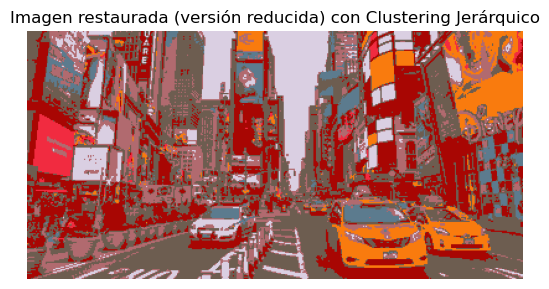

In [10]:


# Restaurar la imagen pequeña con clustering jerárquico
hierarchical_image_small = paleta_cluster[hierarchical_labels].reshape(small_image_array.shape)

# Mostrar la imagen restaurada
plt.imshow(hierarchical_image_small)
plt.axis('off')
plt.title("Imagen restaurada (versión reducida) con Clustering Jerárquico")
plt.show()

#### Aplicación Gaussian Mixture

In [11]:
# Ajustar el modelo Gaussian Mixture con el número óptimo de clusters
gmm = GaussianMixture(n_components=n_clusters, random_state=42).fit(pixels)

# Obtener las etiquetas
gmm_labels = gmm.predict(pixels)




Paleta de colores obtenida: [[ 25  24  19]
 [190 170 160]
 [175  84  49]
 [ 97  87  83]
 [230 240 252]
 [250 175   5]
 [ 43 129 183]]


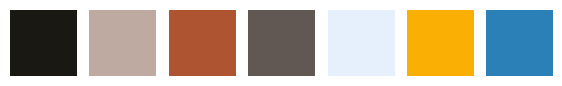

In [12]:
# Crear la nueva paleta de colores
palette_means = np.array(gmm.means_.astype(int))

# Mostrar la paleta de colores encontrada
print("Paleta de colores obtenida:", palette_means)
display_palette(palette_means)

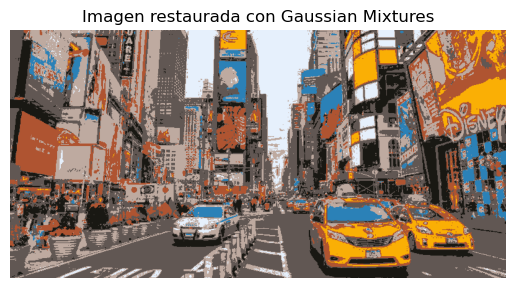

In [13]:
# Restaurar la imagen con Gaussian Mixtures
gmm_image = palette_means[gmm_labels].reshape(image_array.shape)

# Mostrar la imagen restaurada
plt.imshow(gmm_image)
plt.axis('off')
plt.title("Imagen restaurada con Gaussian Mixtures")
plt.show()